In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

## *Understanding the Data* ##

In [2]:
df = pd.read_csv('fifa21_raw_data.csv')
df.head(3)

photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   

                       LongName  \
0                  Lionel Messi   
1  C. Ronaldo dos Santos Aveiro   
2                     Jan Oblak   

                                           playerUrl Nationality Positions  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina  RW ST CF   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal     ST LW   
2  http://sofifa.com/player/200389/jan-oblak/210005/    Slovenia        GK   

                Name  Age  ↓OVA  POT  \
0           L. Messi   33    93   93   
1  Cristiano Ronaldo   35    92   92   
2           J. Oblak   27    91   93   

                            Team & Contract  ...     A/W     D/W   IR PAC  \
0     \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n  ...  Medium     Low  5 ★  85   
1         \n\n\n\nJuventus\n2018 ~ 2022\n\n  ...    High     Low  5 ★  89   
2  \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n  ...  Medium  Medium  3 ★  87   

   SHO PAS  DRI DEF PHY   Hits  
0   92  91   95  38  65  \n372  
1   93  81   89  35  77  \n344  
2   92  78   90  52  90   \n86  

[3 rows x 77 columns]

In [3]:
df.shape

(18979, 77)

In [4]:
df.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

df.info()

In [5]:
df.isnull().sum()

photoUrl       0
LongName       0
playerUrl      0
Nationality    0
Positions      0
              ..
PAS            0
DRI            0
DEF            0
PHY            0
Hits           0
Length: 77, dtype: int64

In [6]:
duplicate_column_names = df.columns[df.columns.duplicated()].tolist()

if duplicate_column_names:
    print(f"Duplicate column names: {duplicate_column_names}")
else:
    print("No duplicate column names found.")

No duplicate column names found.


## *Data Cleaning & Data Transformation* ##

In [7]:
# dropping unnecessary column from the dataset
# dropping LongName column because we have name column also, which mean exactly the same, so we decided to drop LongName column
df = df.drop(['LongName', 'photoUrl', 'playerUrl'], axis = 1)

In [8]:
# remove extra symbol from OVA column
df = df.rename(columns = {'↓OVA' : 'OVA'})

In [9]:
df[['Team', 'Contract']] = df['Team & Contract'].str.strip().str.split('\n', expand=True).iloc[:, -2:]

In [10]:
df['Team']

0                               FC Barcelona
1                                   Juventus
2                            Atlético Madrid
3                            Manchester City
4                        Paris Saint-Germain
                        ...                 
18974    Chongqing Dangdai Lifan FC SWM Team
18975                        Oldham Athletic
18976                             Wuhan Zall
18977                        Oldham Athletic
18978                           Club Bolívar
Name: Team, Length: 18979, dtype: object

In [11]:
# df['Contract']

In [12]:
df['Height']

0         5'7"
1         6'2"
2         6'2"
3        5'11"
4         5'9"
         ...  
18974    5'10"
18975     5'7"
18976    5'10"
18977     5'9"
18978     5'9"
Name: Height, Length: 18979, dtype: object

In [13]:
# Function to convert height from "feet'inches\"" to inches
def convert_height_to_inches(height):
    feet, inches = height.split("'")
    feet = int(feet)
    inches = int(inches.replace("\"", ""))
    total_inches = feet * 12 + inches
    return total_inches

# Apply the conversion function
df['Height(inch)'] = df['Height'].apply(convert_height_to_inches)
df['Height(inch)']

0        67
1        74
2        74
3        71
4        69
         ..
18974    70
18975    67
18976    70
18977    69
18978    69
Name: Height(inch), Length: 18979, dtype: int64

In [14]:
# converts height from ft to inch
def convert_height_to_inches(height):
    if isinstance(height, str):  
        feet, inches = height.split("'")  
        inches = inches.replace('"', '')  
        total_inches = int(feet) * 12 + int(inches)  
        return total_inches
    else:
        return height


df['Height'] = df['Height'].apply(convert_height_to_inches)

In [15]:
df['Height']

0        67
1        74
2        74
3        71
4        69
         ..
18974    70
18975    67
18976    70
18977    69
18978    69
Name: Height, Length: 18979, dtype: int64

In [16]:
# clean the weight column by removing the extra text

df['Weight'] = df['Weight'].str.replace('lbs', '')

In [17]:
#df['Weight']

In [18]:
# convert height & weight column to int

df[['Height', 'Weight']].astype('int64')

Height  Weight
0          67     159
1          74     183
2          74     192
3          71     154
4          69     150
...       ...     ...
18974      70     154
18975      67     128
18976      70     146
18977      69     143
18978      69     150

[18979 rows x 2 columns]

In [19]:
#df = df.drop('Height(inch)', axis = 1)

In [20]:
# clean Hits column by extra text
df['Hits'] = df['Hits'].str.replace('\n', '')
df['Hits']

0        372
1        344
2         86
3        163
4        273
        ... 
18974    NaN
18975    NaN
18976    NaN
18977    NaN
18978    NaN
Name: Hits, Length: 18979, dtype: object

In [21]:
# convert the Joined column to just the year
df['Joined'] = pd.to_datetime(df['Joined']).dt.year

In [22]:
df['Joined']

0        2004
1        2018
2        2014
3        2015
4        2017
         ... 
18974    2020
18975    2020
18976    2018
18977    2020
18978    2020
Name: Joined, Length: 18979, dtype: int32

In [23]:
# calculate the number of years at the team
current_year = datetime.now().year
df['years_at_club'] = current_year - df['Joined']

In [24]:
df['years_at_club']

0        20
1         6
2        10
3         9
4         7
         ..
18974     4
18975     4
18976     6
18977     4
18978     4
Name: years_at_club, Length: 18979, dtype: int32

In [25]:
# filter players with more than 10 years at club
players_exceed_10yrs = df[df['years_at_club'] > 10]
players_exceed_10yrs[['Name', 'Team', 'Joined', 'years_at_club']].set_index('Name')

Team  Joined  years_at_club
Name                                                   
L. Messi            FC Barcelona    2004             20
Casemiro             Real Madrid    2013             11
M. Neuer       FC Bayern München    2011             13
K. Benzema           Real Madrid    2009             15
Sergio Ramos         Real Madrid    2005             19
...                          ...     ...            ...
Yao Hanlin            Wuhan Zall    2010             14
O. Al Sunain          Ettifaq FC    2013             11
Chang Feiya     Guangzhou R&F FC    2013             11
Sun Shoubo            Wuhan Zall    2013             11
B. Al Bahrani           Al Fateh    2013             11

[691 rows x 3 columns]

In [26]:
def money(x):
    if "€" in x:
        x = x.replace("€", "")

    if "M" in x:
        x = x.replace("M", "")
        return int(float(x) * 1_000_000)

    elif "K" in x:
        x = x.replace("K", "")
        return int(float(x) * 1_000)

    return int(x)

df["Value"] = df["Value"].apply(money) / 1_000_000
df["Wage"] = df["Wage"].apply(money)
df["Release Clause"] = df["Release Clause"].apply(money) / 1_000_000

df.rename(columns={
    "Value": "Values in Euro Million",
    "Wage": "Wage in Euros",
    "Release Clause": "Release Clause in Euro Million"
}, inplace=True)

In [27]:
df[['Values in Euro Million', 'Wage in Euros', 'Release Clause in Euro Million']].head()

Values in Euro Million  Wage in Euros  Release Clause in Euro Million
0                    67.5         560000                           138.4
1                    46.0         220000                            75.9
2                    75.0         125000                           159.4
3                    87.0         370000                           161.0
4                    90.0         270000                           166.5

In [28]:
# remove * sign from 'W/F','SM','IR' these three columns
#df[['W/F','SM','IR']].head()

df["W/F"]=df["W/F"].str.replace("★","")
df["SM"]=df["SM"].str.replace("★","")
df["IR"]=df["IR"].str.replace("★","")

df.rename(columns={'W/F':'W/F Rating','SM':'SM Rating','IR':'IR Rating'},inplace =True)

In [29]:
df[['W/F Rating','SM Rating','IR Rating']].head()

W/F Rating SM Rating IR Rating
0         4          4        5 
1         4          5        5 
2         3          1        3 
3         5          4        4 
4         5          5        5

In [30]:
def type(x):
    if "Free" in x:
        return "Free"
    if "Loan" in x:
        return "Loan"
    if "~" in x:
        return "Contract"
    else:
        return pd.na


def start_time_contract(x):
    if "~" in x:
        return  int(x[:4])
    if "Loan" in x:
        x=x.strip(" On Loan")
        x= datetime.strptime(x, "%b %d, %Y")
        return x.date()
    else:
        return pd.NA

def end_time_contract(type,contract,loan):
    if type == "Contract":
        return int(contract[-4:])
    if type == "Loan":
        loan = datetime.strptime(loan, "%b %d, %Y")
        return loan.date()

    else:
        return pd.NA

df["Type of contract"] = df["Contract"].apply(type)
df["Start year"] = df["Contract"].apply(start_time_contract)
df["End year"] = df.apply(lambda row: end_time_contract(row["Type of contract"],row["Contract"],row["Loan Date End"] ), axis=1)

In [31]:
df['Loan Date End'].unique()

array([nan, 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [32]:
df=df[list(df.columns[:7])+list(df.columns[-3:])+list(df.columns[8:-3])]
df=df.drop(columns=["Loan Date End"])

In [33]:
df[['Type of contract','Start year','End year']].head()

Type of contract Start year End year
0         Contract       2004     2021
1         Contract       2018     2022
2         Contract       2014     2023
3         Contract       2015     2023
4         Contract       2017     2022

In [34]:
df['Type of contract'].unique()

array(['Contract', 'Loan', 'Free'], dtype=object)

In [35]:
df[['Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping']].head()

Attacking  Skill  Movement  Power  Mentality  Defending  Goalkeeping
0        429    470       451    389        347         91           54
1        437    414       431    444        353         84           58
2         95    109       307    268        140         57          437
3        407    441       398    408        408        186           56
4        408    448       453    357        356         94           59

In [36]:
columns_to_avg = ['Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping']

# Calculate the average of the selected columns for each Name
df['Overall_Average'] = df[columns_to_avg].mean(axis=1)

In [37]:
df[['Name', 'Overall_Average']].sort_values(by = 'Overall_Average', ascending = False).head(10)

Name  Overall_Average
45         L. Suárez       330.857143
3       K. De Bruyne       329.142857
33   Bruno Fernandes       329.000000
37      A. Griezmann       326.857143
108      Alex Telles       326.000000
153         M. Acuña       325.714286
195         Paulinho       325.571429
203    R. Nainggolan       324.285714
19        J. Kimmich       324.142857
95      G. Wijnaldum       323.857143

In [38]:
df['Hits'].unique()

array(['372', '344', '86', '163', '273', '182', '646', '79', '164', '170',
       '93', '131', '89', '90', '169', '187', '103', '317', '239', '56',
       '130', '229', '124', '172', '114', '46', '663', '479', '203',
       '198', '122', '565', '152', '140', '276', '209', '25', '136',
       '109', '139', '42', '99', '137', '166', '80', '104', '150', '112',
       '285', '133', '96', '69', '143', '100', '38', '83', '67', '207',
       '416', '315', '206', '424', '191', '454', '271', '249', '121',
       '246', '171', '148', '329', '70', '97', '73', '210', '82', '146',
       '62', '165', '129', '162', '35', '65', '47', '77', '106', '84',
       '1.3K', '310', '181', '364', '200', '141', '134', '259', '309',
       '367', '224', '211', '60', '176', '108', '63', '111', '52', '59',
       '350', '54', '117', '27', '91', '365', '312', '286', '157', '291',
       '245', '258', '233', '767', '288', '57', '115', '123', '142',
       '149', '227', '75', '53', '113', '71', '92', '144', '132', '

In [39]:
def convert_hits(x):
    if pd.isna(x):
        return np.nan
    elif 'K' in str(x):
        return float(x[:-1])
    else:
        return float(x)

df['Hits in K'] = df['Hits'].apply(convert_hits)

df.drop(columns=['Hits'], inplace=True)

print(df['Hits in K'].head(10))

0    372.0
1    344.0
2     86.0
3    163.0
4    273.0
5    182.0
6    646.0
7     79.0
8    164.0
9    170.0
Name: Hits in K, dtype: float64


In [40]:
df['Hits in K'].isnull().sum()

2595

In [41]:
# Fill NaN values in 'Hits in K' with the mean of the column
df.fillna({'Hits in K': df['Hits in K'].mean()}, inplace=True)

In [42]:
# checking
df['Hits in K'].isnull().sum()

0

In [43]:
# change the datatype of IR rating Column
df['IR Rating'] = df['IR Rating'].astype('int64')

In [44]:
df[['IR Rating', 'PAS']]

IR Rating  PAS
0              5   91
1              5   81
2              3   78
3              4   93
4              5   86
...          ...  ...
18974          1   26
18975          1   40
18976          1   26
18977          1   48
18978          1   43

[18979 rows x 2 columns]

## *Exploratory Data Analysis* ##

### *Univariate Analysis, Bivariate Analysis & Multivariate Analysis* ###

Text(0, 0.5, 'Wage in Euros')

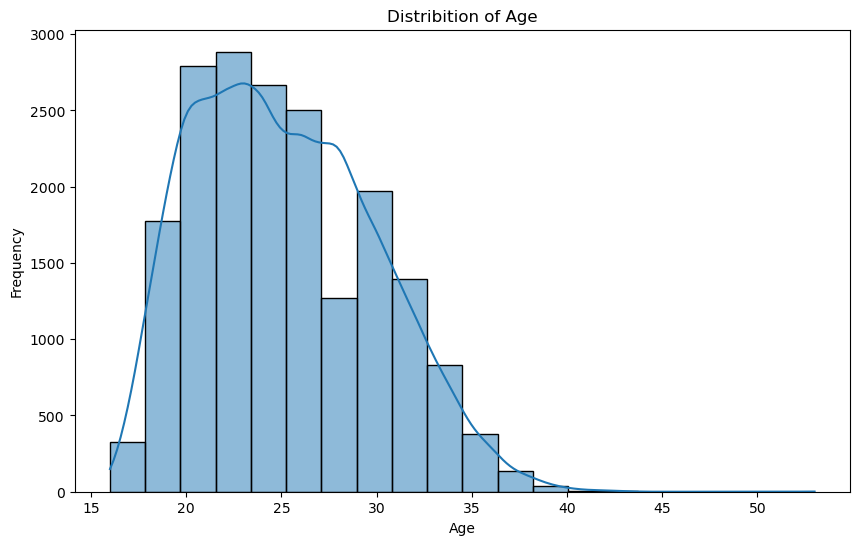

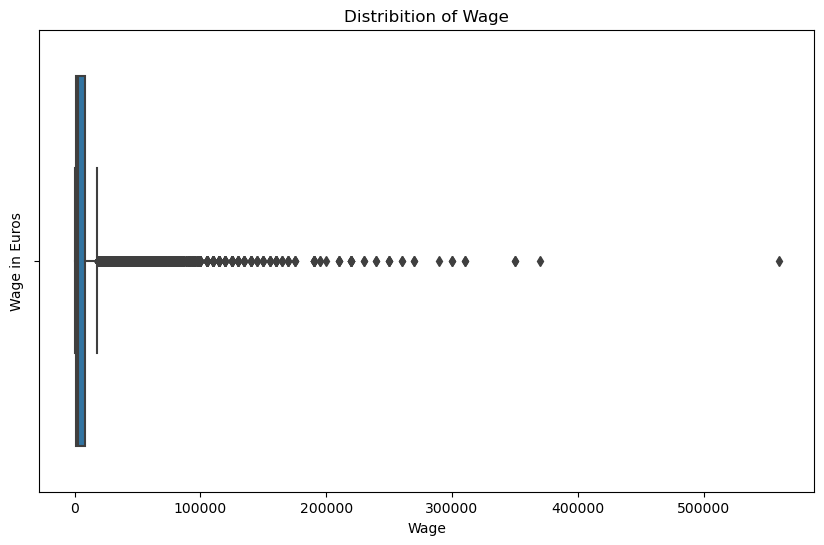

In [45]:
# Histogram for Age
plt.figure(figsize = (10, 6))
sns.histplot(df['Age'], bins = 20, kde = True)
plt.title('Distribition of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Box Plot for Wage
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Wage in Euros', data = df)
plt.title('Distribition of Wage')
plt.xlabel('Wage')
plt.ylabel('Wage in Euros')


*In the Histplot diagram we can see that the peak of the distribution is around the ages of 20 to 25, indicating that this age group is the most frequent in our dataset.*

*In the Boxplot diagram we can see that there is a significant concentration of data near the lower end, and the presence of many outliers at higher wage levels.*

*The median wage is relatively low compared to the extreme upper outliers, indicating that a few high-earning individuals are skewing the distribution.*

Text(0, 0.5, 'Wage in Euros')

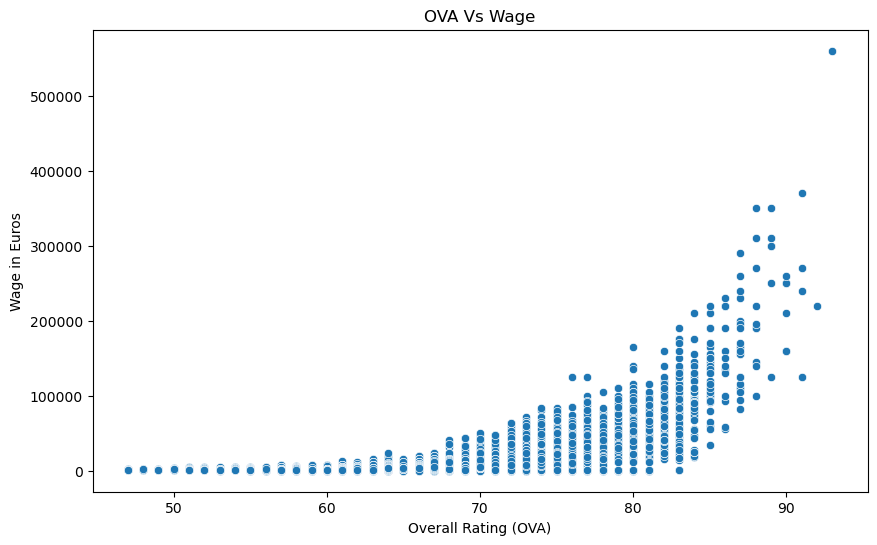

In [46]:
# scatter plot between OVA & Wage column
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'OVA', y = 'Wage in Euros', data = df)
plt.title('OVA Vs Wage')
plt.xlabel('Overall Rating (OVA)')
plt.ylabel('Wage in Euros')

### *Positive Correlation:*

There is a clear positive trend: as the Overall Rating (OVA) of a player increases, their Wage also tends to increase. This means that higher-rated players generally earn more money.
The pattern is especially noticeable for players with OVA above 80, where wages start to increase significantly.

### *Wage Disparity:*

Players with lower OVA ratings (below 70) mostly have very low wages. There are only a few exceptions, indicating that most players with modest ratings are paid similarly.
For players with OVA ratings between 80 and 90, wages show more variability. Some players earn moderate wages, while others earn extremely high amounts, which might be due to their role, popularity, or club's financial status.

### *Outliers:*

There are several outliers, especially among players with high OVA (around 90 or more), who earn wages significantly higher than others in the same rating group. These could represent superstar players with exceptional contracts.
The highest wage in the chart appears well above 500,000 Euros, showing a stark difference between top players and others.

Text(0.5, 1.0, 'Player Potential vs Age')

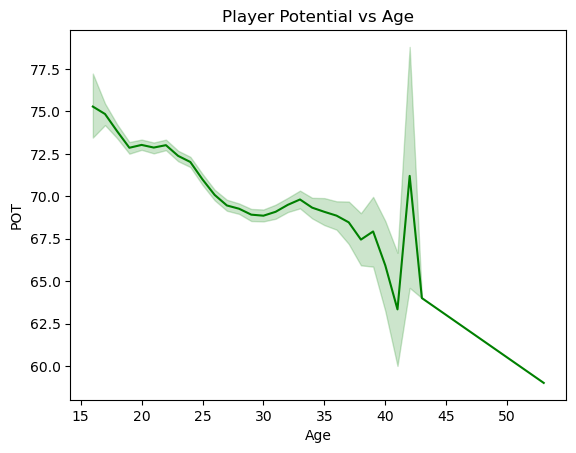

In [47]:
sns.lineplot(x=df['Age'],y=df['POT'],color='green')
plt.title('Player Potential vs Age')

*The chart is about how good FIFA players are expected to become (their potential) as they get older.*

*• On the left side of the chart, where the ages are younger (around 15 to 20 years old), the line is higher. This means younger players generally have higher potential and are seen as having a lot of room to improve.*

*• As the line moves to the right (towards older ages), it goes down. This shows that as players get older, their expected potential decreases.*

*• Around age 30, the potential drops more quickly. This reflects that players' abilities usually start to decline once they pass their prime playing years.*

*• After 40 years old, the chart becomes a bit wild, with the line having sharp ups and downs. This is because there aren’t many older players, and the data for them is less reliable.*

In [48]:
df.describe().T

count        mean        std         min         25%  \
Age              18979.0   25.194583   4.710753   16.000000   21.000000   
OVA              18979.0   65.718636   6.968999   47.000000   61.000000   
POT              18979.0   71.136098   6.114176   47.000000   67.000000   
Height           18979.0   71.348069   2.684666   61.000000   69.000000   
BOV              18979.0   66.751620   6.747017   48.000000   62.000000   
...                  ...         ...        ...         ...         ...   
PHY              18979.0   64.368618   9.601665   28.000000   58.000000   
Height(inch)     18979.0   71.348069   2.684666   61.000000   69.000000   
years_at_club    18979.0    5.711892   2.086655    4.000000    4.000000   
Overall_Average  18979.0  227.899122  38.554792  106.714286  207.428571   
Hits in K        18979.0   17.524384  48.043067    1.000000    2.000000   

                        50%         75%         max  
Age               25.000000   29.000000   53.000000  
OVA               66.000000   70.000000   93.000000  
POT               71.000000   75.000000   95.000000  
Height            71.000000   73.000000   81.000000  
BOV               67.000000   71.000000   93.000000  
...                     ...         ...         ...  
PHY               65.000000   71.000000   91.000000  
Height(inch)      71.000000   73.000000   81.000000  
years_at_club      5.000000    6.000000   26.000000  
Overall_Average  232.428571  254.428571  330.857143  
Hits in K          5.000000   17.524384  984.000000  

[64 rows x 8 columns]

## *Outlier Detection* ##

### *Boxplot Before Outlier* ###

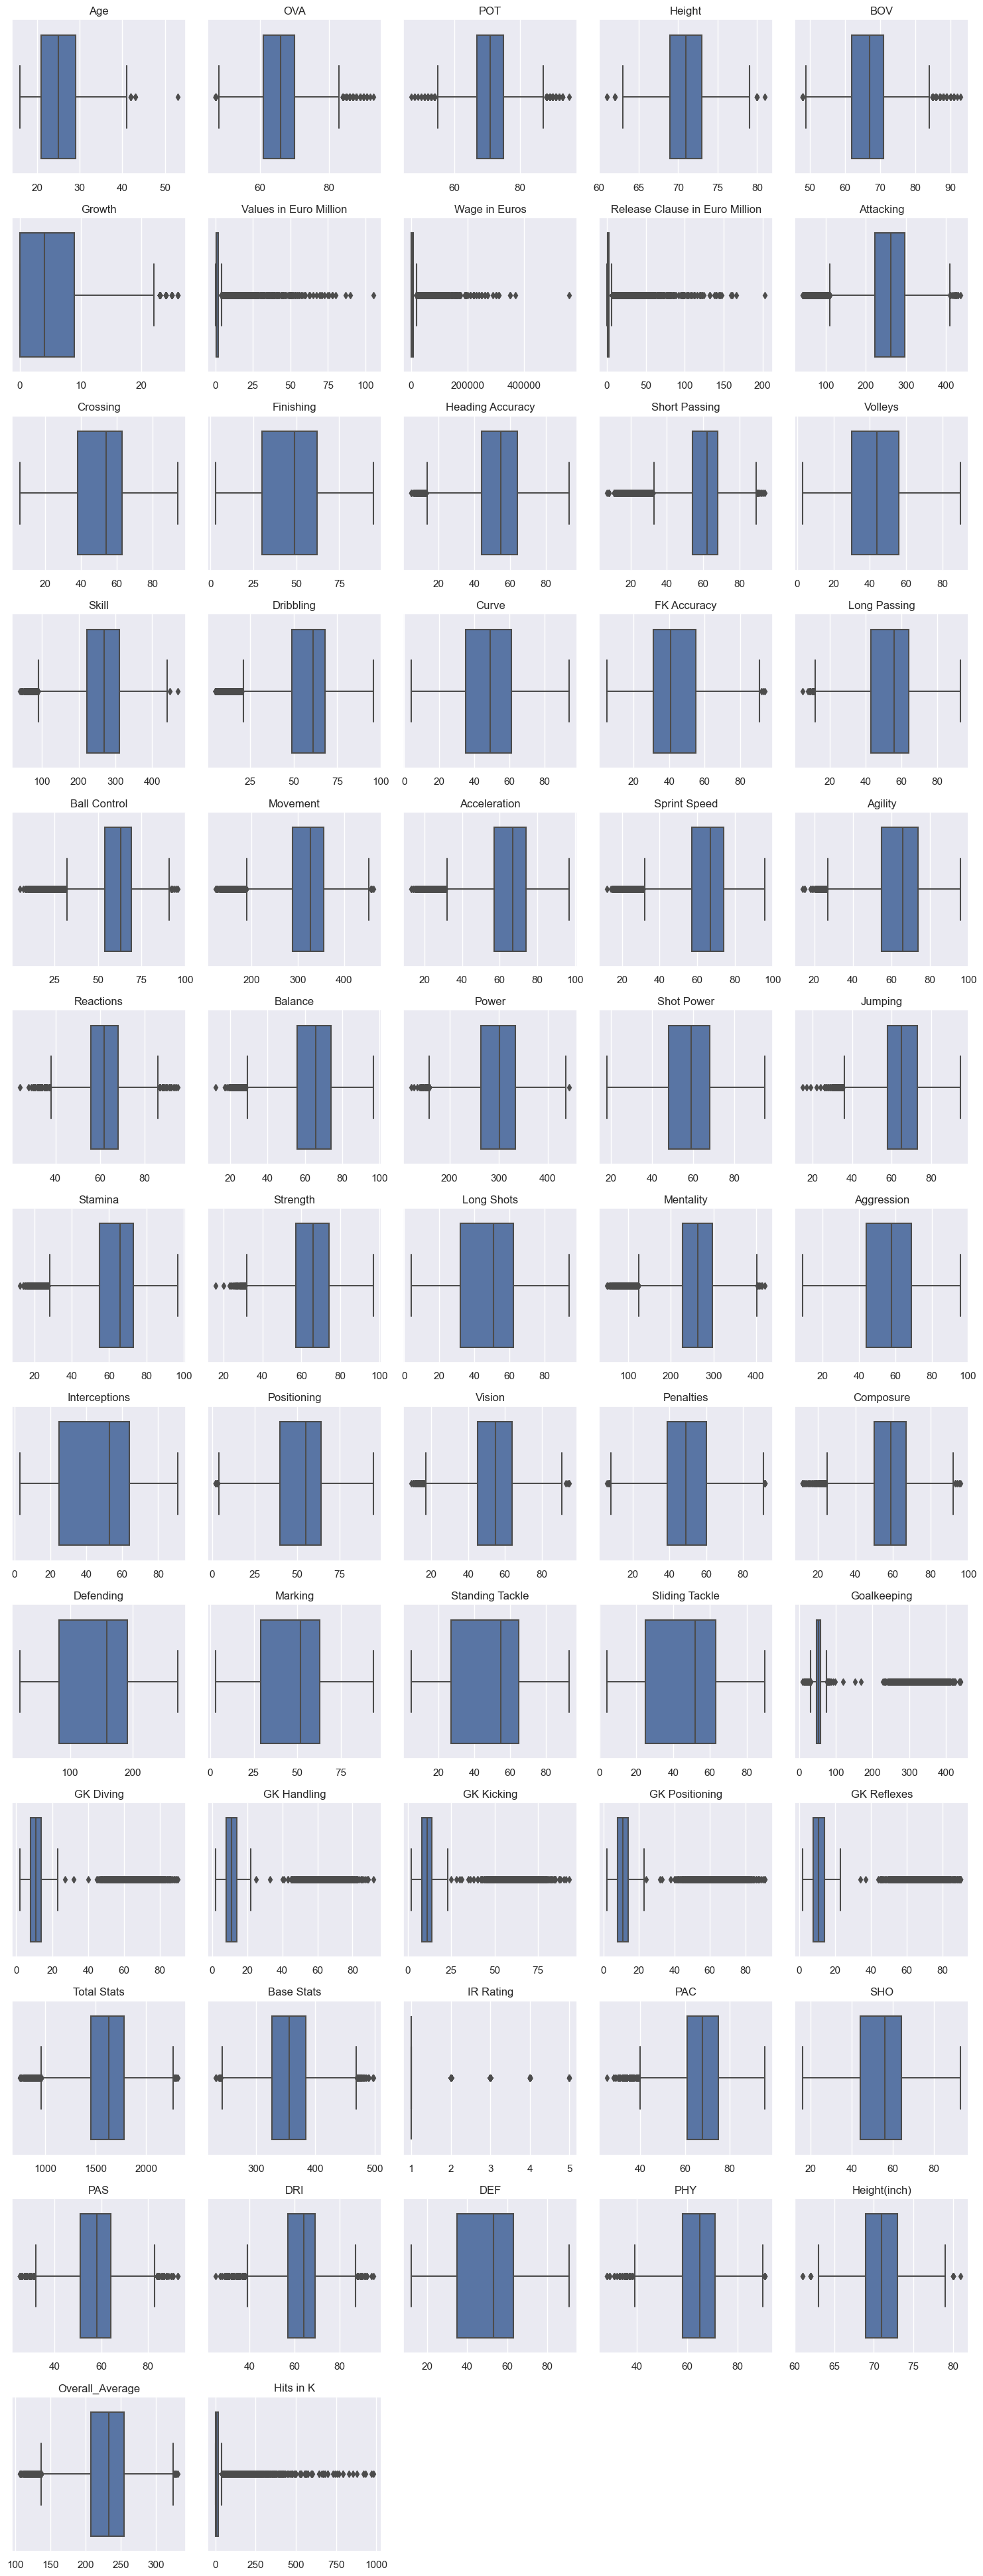

In [49]:
sns.set(style="darkgrid")

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 3, num_rows * 3))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()

In [50]:
def handle_outliers_iqr(df, multiplier=1.5):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        #print(f"Outliers detected in '{column}': {outliers.index.tolist()}")

        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

df = handle_outliers_iqr(df, multiplier=1.5)

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    remaining_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not remaining_outliers.empty:
        print(f"Remaining outliers in '{column}': {remaining_outliers.index.tolist()}")
    else:
        print(f"No remaining outliers in '{column}'.")

No remaining outliers in 'Age'.
No remaining outliers in 'OVA'.
No remaining outliers in 'POT'.
No remaining outliers in 'Height'.
No remaining outliers in 'BOV'.
No remaining outliers in 'Growth'.
No remaining outliers in 'Values in Euro Million'.
No remaining outliers in 'Wage in Euros'.
No remaining outliers in 'Release Clause in Euro Million'.
No remaining outliers in 'Attacking'.
No remaining outliers in 'Crossing'.
No remaining outliers in 'Finishing'.
No remaining outliers in 'Heading Accuracy'.
No remaining outliers in 'Short Passing'.
No remaining outliers in 'Volleys'.
No remaining outliers in 'Skill'.
No remaining outliers in 'Dribbling'.
No remaining outliers in 'Curve'.
No remaining outliers in 'FK Accuracy'.
No remaining outliers in 'Long Passing'.
No remaining outliers in 'Ball Control'.
No remaining outliers in 'Movement'.
No remaining outliers in 'Acceleration'.
No remaining outliers in 'Sprint Speed'.
No remaining outliers in 'Agility'.
No remaining outliers in 'React

### *Boxplot After Outlier* ###

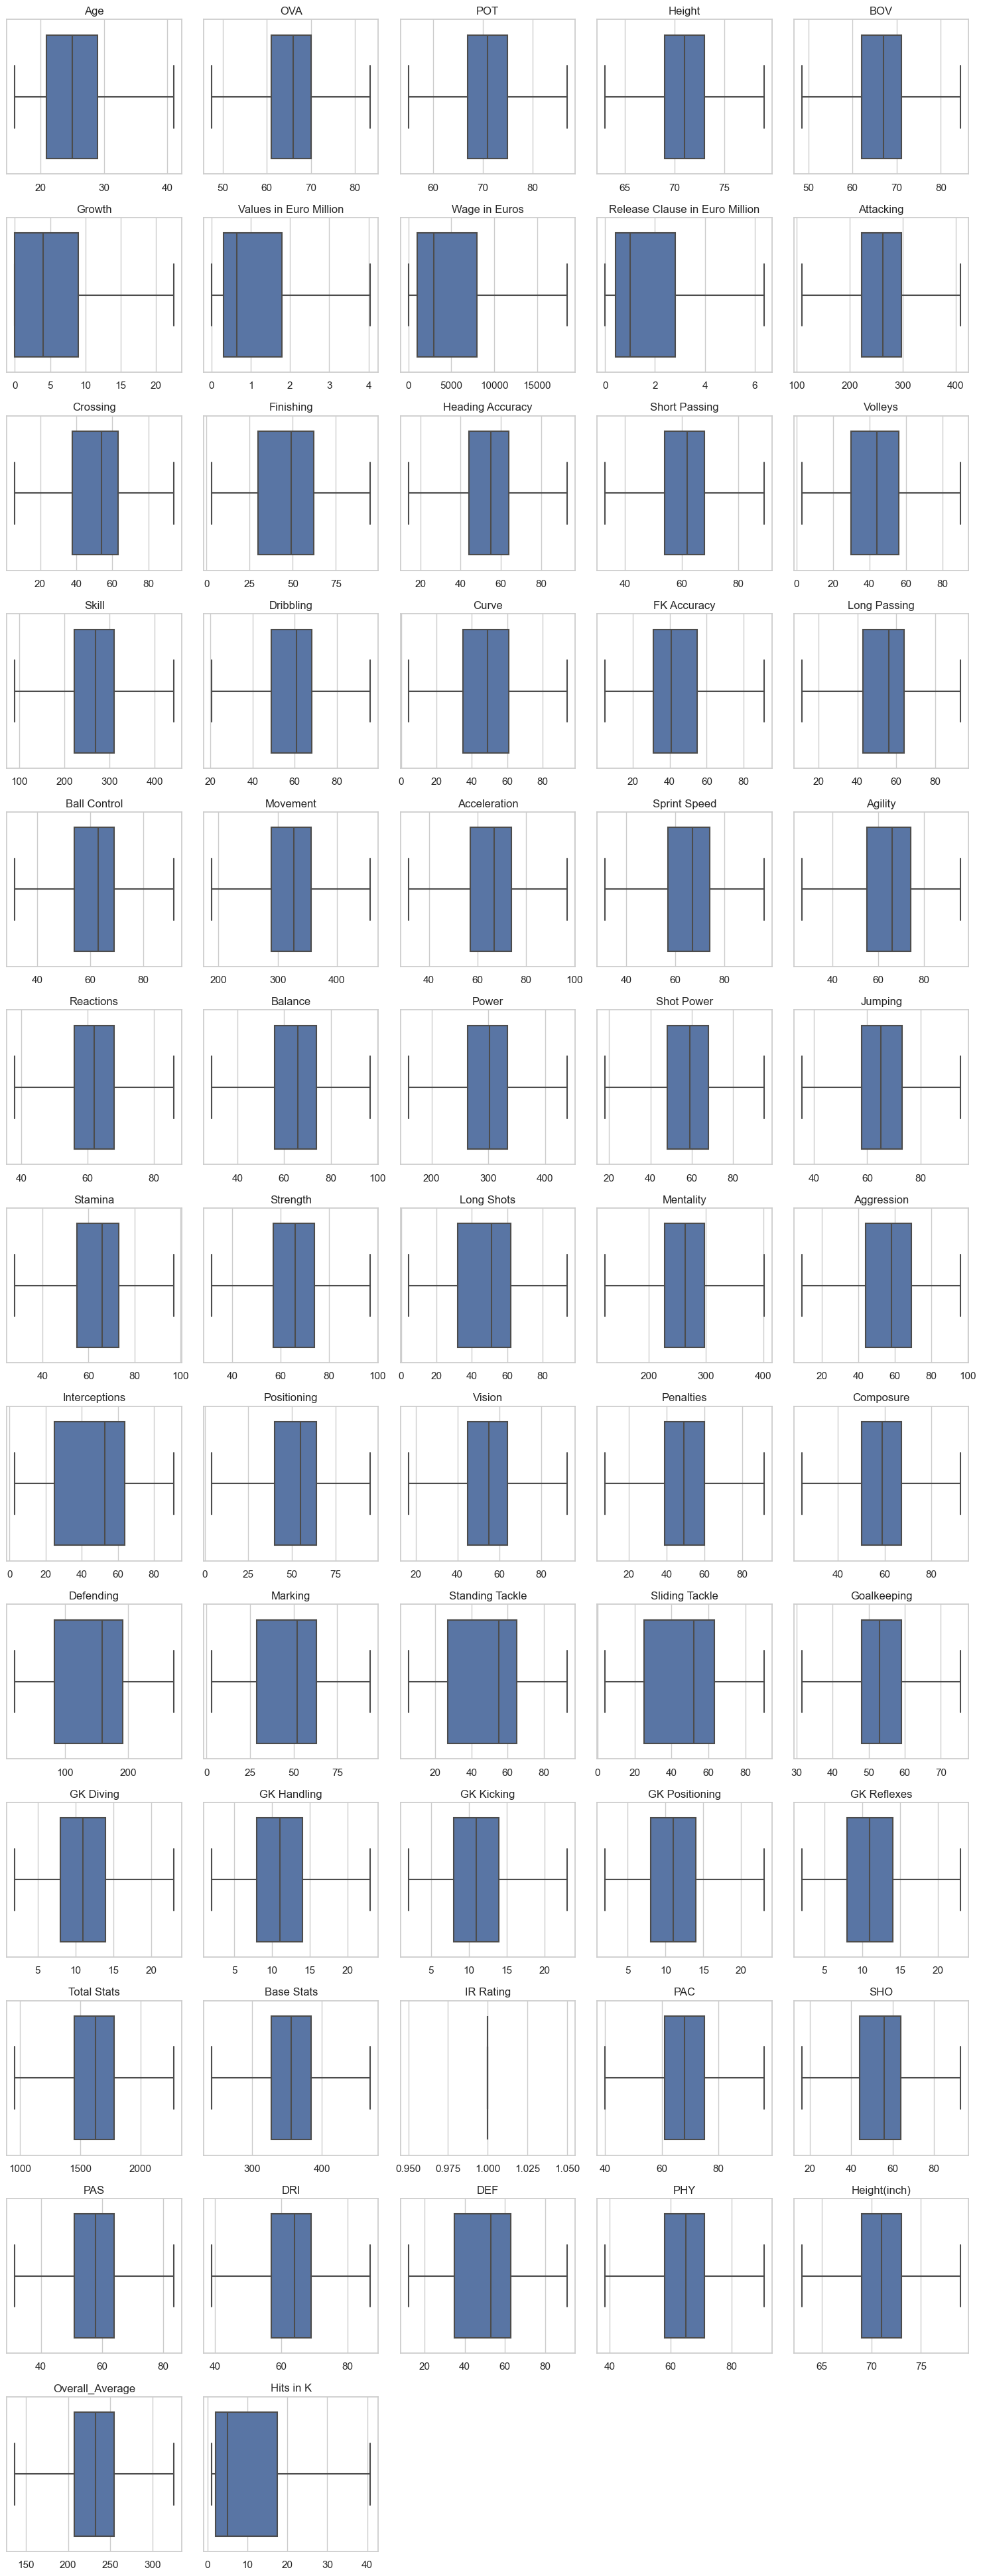

In [51]:
sns.set(style="whitegrid")

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns  # Round up division

plt.figure(figsize=(num_columns * 3, num_rows * 3))  # Adjust size based on number of plots

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

## *Visualizations* ##

### *Histogram* ###

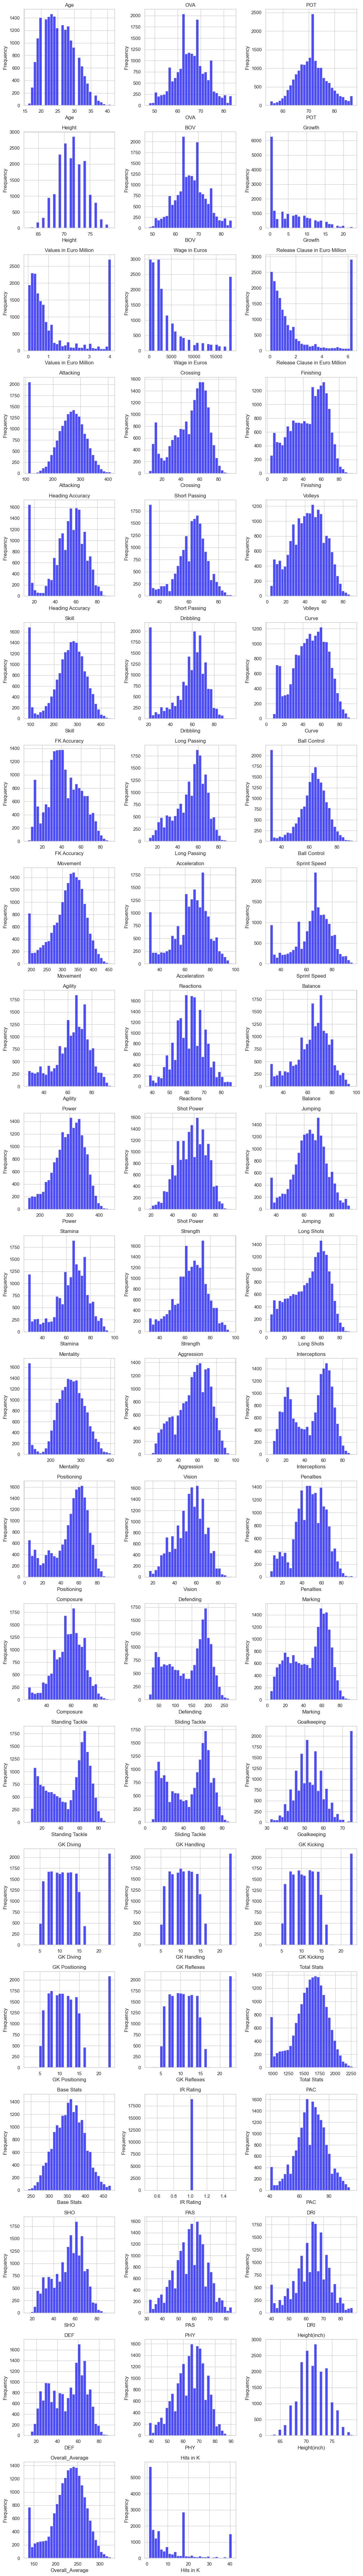

In [52]:
num_columns = 3
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 4, num_rows * 4))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    plt.hist(df[column], bins=30, color='blue', alpha=0.7)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### *Violin Plot* ###

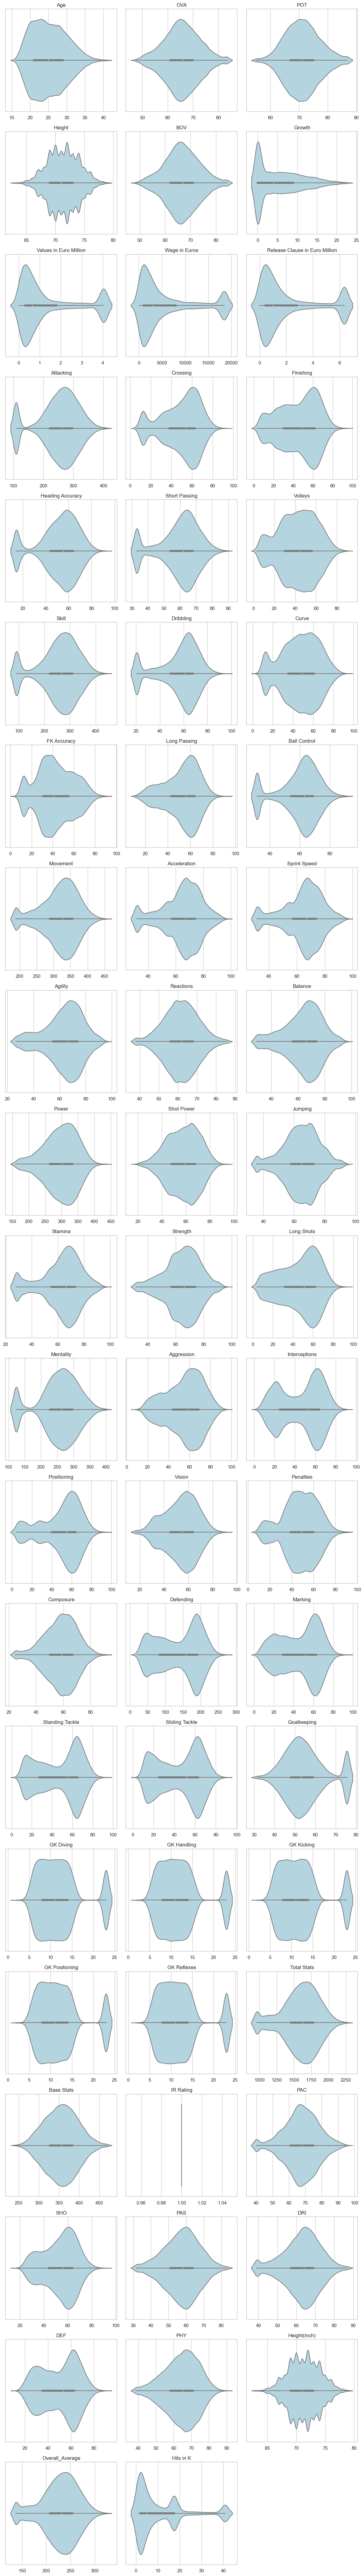

In [53]:
sns.set(style="whitegrid")

num_columns = 3
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 4, num_rows * 4))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.violinplot(x=df[column], color='lightblue')
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

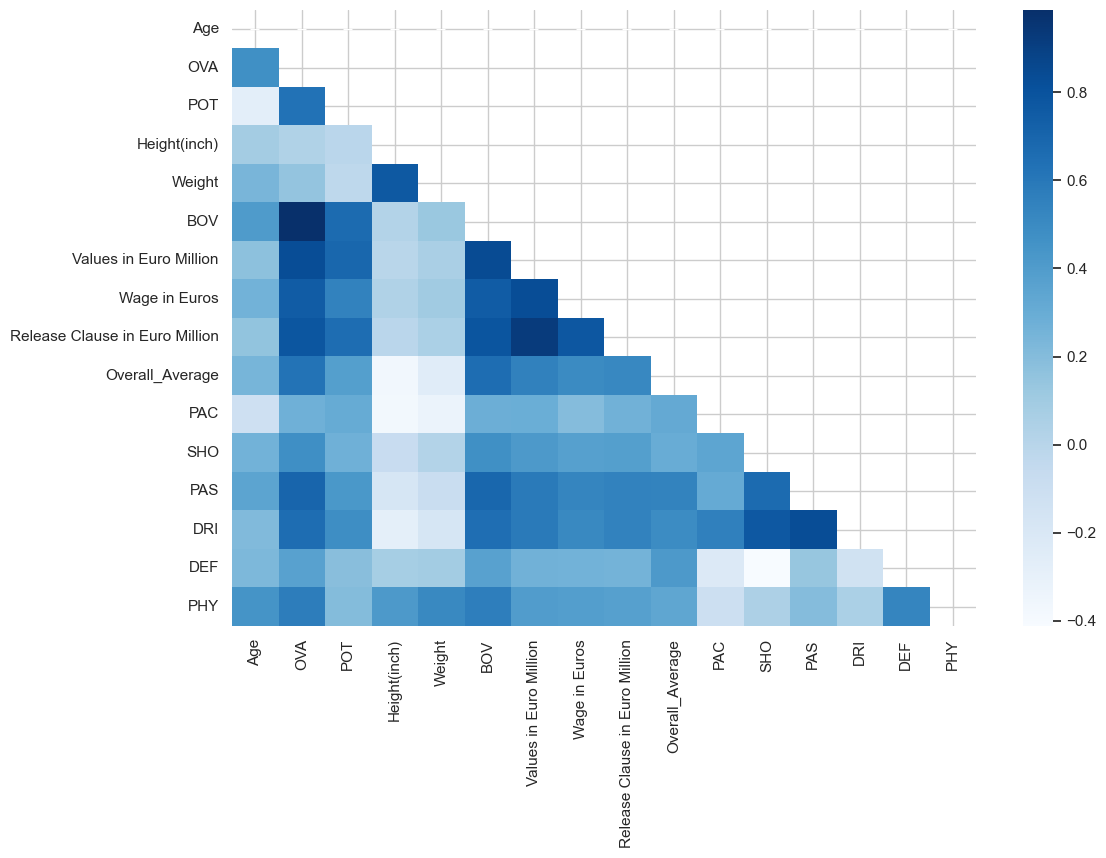

In [54]:
df_s = df[["Age","OVA","POT","Height(inch)","Weight","BOV","Values in Euro Million","Wage in Euros","Release Clause in Euro Million","Overall_Average","PAC","SHO","PAS",
           "DRI","DEF","PHY"]]


corr_matrix = df_s.corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", mask=mask)


plt.show()

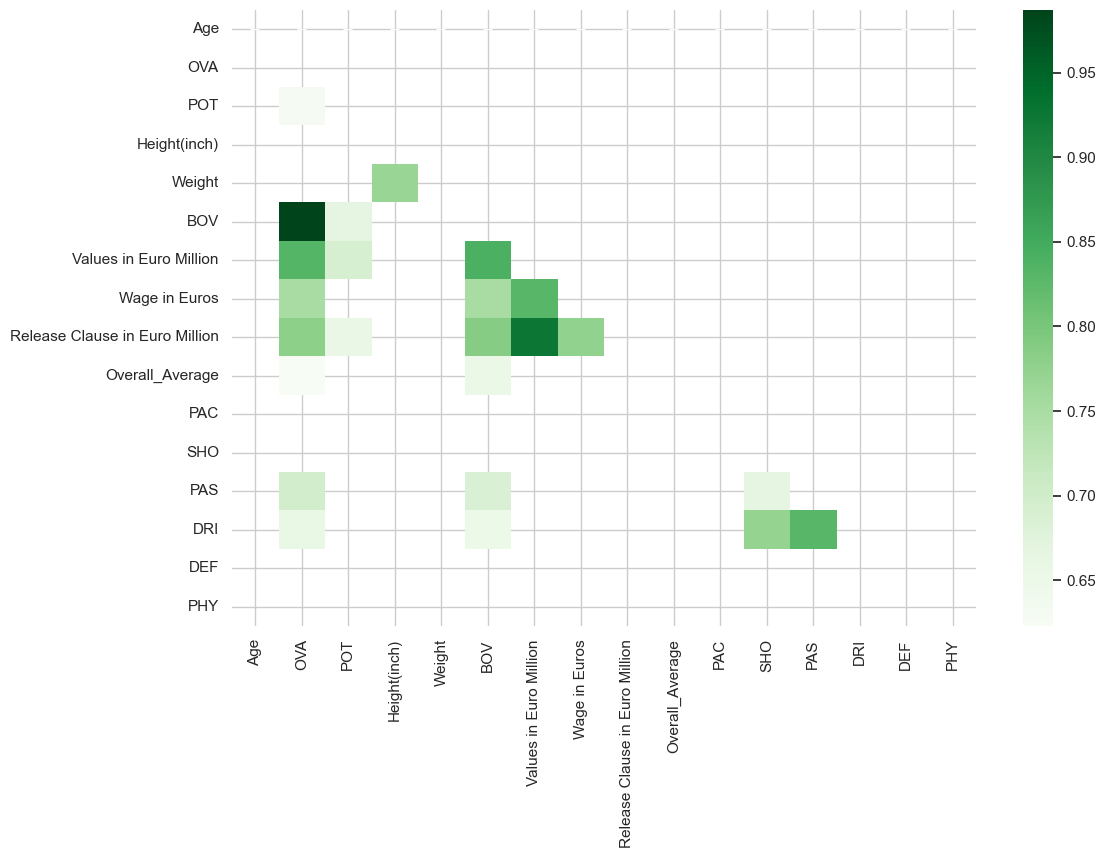

In [55]:
high_corr = corr_matrix[(corr_matrix > 0.6) | (corr_matrix < -0.6)]

mask = np.triu(np.ones_like(high_corr, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(high_corr, annot=True, fmt=".2f", cmap="Greens", mask=mask)

plt.show()

### *Player count by all country* ###

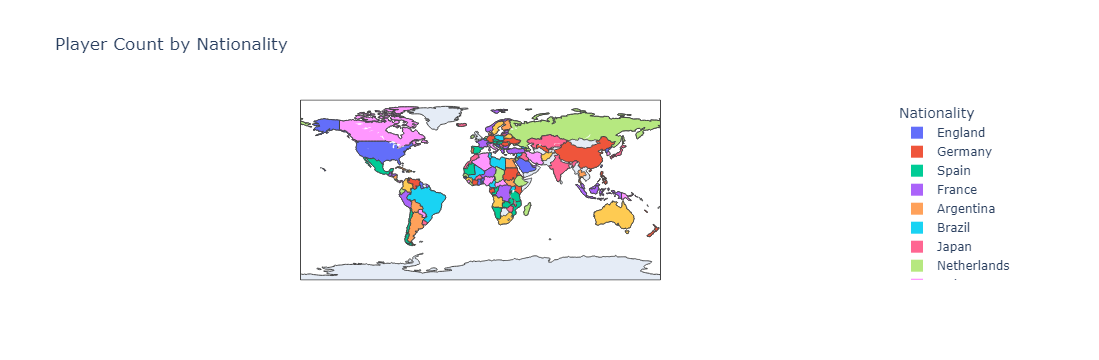

In [56]:
import plotly.express as px

nationality_counts = df['Nationality'].value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Count']

fig = px.choropleth(
    data_frame=nationality_counts,
    locations='Nationality',
    locationmode='country names',
    color='Nationality',
    hover_name='Nationality',
    hover_data={'Count': True},
    scope='world',
    title='Player Count by Nationality'
)

fig.show()

### *Total Value od Players by Team* ###

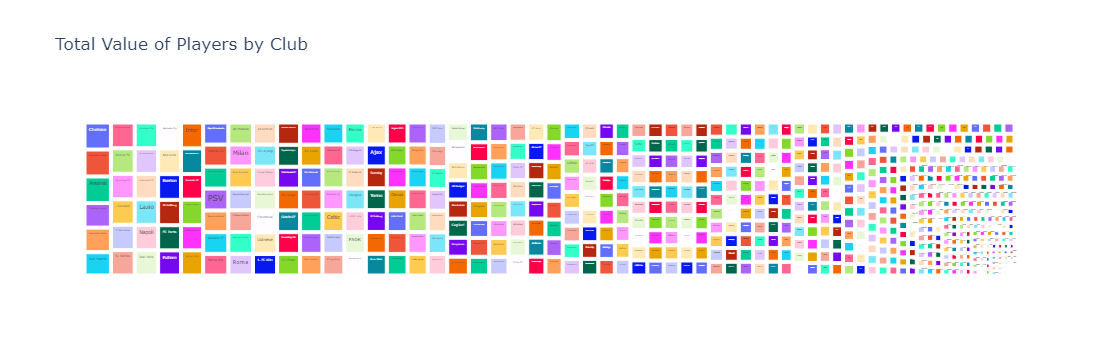

In [57]:
fig = px.treemap(df, path=['Team'], values='Values in Euro Million', title='Total Value of Players by Club')
fig.show()

### *Countries with the most players in the top 100* ###

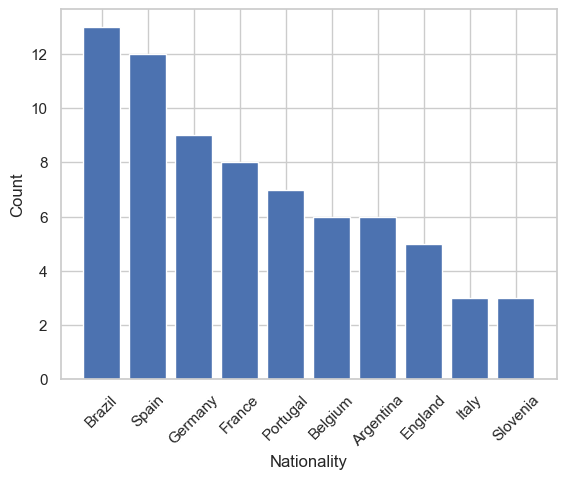

In [58]:
df100 = df.sort_values(by="OVA",ascending=False)
df100 = df100[0:100]
nationality_counts = df100.groupby("Nationality").size().reset_index(name="Count")
nationality_counts = nationality_counts.sort_values(by="Count", ascending=False)
nationality_counts = nationality_counts[0:10]

plt.bar(nationality_counts["Nationality"], nationality_counts["Count"])
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()